In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade pip

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=60b2bea1cc80d5745d226946e19ae921a72d7e8d350e8e6572637aefd21eaa7f
  Stored in directory: c:\users\alexm\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\alexm\\AppData\\Local\\Temp\\pip-uninstall-kxyjyt27\\pip.exe'
Consider using the `--user` option or check the permissions.



In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

## Read in the data

In [5]:
df = pd.read_csv("big_set_data.csv")
df.head()

,Unnamed: 0,Zip_Code,Year,Month,Sale_Price,Property_Tax,Rent_Price,Household_Income,Rent_Affordability,Total_Sales,...,Average_Commute,Crime_Index,Loan_Amount,Loan_Term,Loan_R,Loan_Payment,Home_Affordability,Last_Month_Price,Last_Month_Diff,Price_Change_1mo
0,1,32003,2019,2,270000.0,3778,1113,94154.0,0.141853,41,...,35,28,216000.0,360.0,1.003642,1077.819242,0.137369,244950.0,25050.0,1
1,2,32003,2019,3,275000.0,3778,1113,94154.0,0.141853,21,...,35,28,220000.0,360.0,1.003554,1084.200547,0.138182,270000.0,5000.0,1
2,3,32003,2019,4,264500.0,3778,1113,94154.0,0.141853,42,...,35,28,211600.0,360.0,1.003452,1027.671397,0.130978,275000.0,-10500.0,0
3,4,32003,2019,5,281000.0,3778,1113,94154.0,0.141853,66,...,35,28,224800.0,360.0,1.003393,1082.581718,0.137976,264500.0,16500.0,1
4,5,32003,2019,6,275000.0,3778,1113,94154.0,0.141853,43,...,35,28,220000.0,360.0,1.003169,1025.419293,0.130690,281000.0,-6000.0,0


## Select features

In [6]:
# Set features. 
X = df[['Zip_Code', 'Year', 'Month', 'Total_Sales', 'FHA_Count', 
'Home_Affordability', 'Rent_Affordability', 'Sale_Price' ]]
X.head()

,Zip_Code,Year,Month,Total_Sales,FHA_Count,Home_Affordability,Rent_Affordability,Sale_Price
0,32003,2019,2,41,2,0.137369,0.141853,270000.0
1,32003,2019,3,21,7,0.138182,0.141853,275000.0
2,32003,2019,4,42,3,0.130978,0.141853,264500.0
3,32003,2019,5,66,8,0.137976,0.141853,281000.0
4,32003,2019,6,43,3,0.130690,0.141853,275000.0


In [7]:
#Set Y values as categorical
y=pd.get_dummies(df["Price_Change_1mo"])
y
target_names = ["COOL MONTH", "HOT MONTH"]

In [8]:
#Check shapes to make sure they align. y.shape 
print(X.shape, y.shape)

(20855, 8) (20855, 2)


In [9]:
# Create a Train Test Split

# PROPER COLUMN NAME FOR for the y values -- CREATE A 'BUY' COLUMN BASED ON ABOVE CATEGORIZATION

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y[1]) #IF Y WAS 2 COLS, ELSE, JUST Y

In [10]:
#Check training X set
X_train.head()

,Zip_Code,Year,Month,Total_Sales,FHA_Count,Home_Affordability,Rent_Affordability,Sale_Price
14172,33786,2020,12,6,0,0.256770,0.178386,565000.0
12750,33603,2019,5,62,6,0.191843,0.316451,200000.0
16706,34216,2019,6,3,0,0.468619,0.206757,775000.0
14558,33839,2020,9,9,5,0.033695,0.243886,42500.0
10362,33324,2020,1,68,7,0.129691,0.257164,208750.0


## Pre-processing


In [11]:
# Scale the data
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

In [12]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.985/0.523
k: 3, Train/Test Score: 0.759/0.530
k: 5, Train/Test Score: 0.701/0.535
k: 7, Train/Test Score: 0.675/0.532
k: 9, Train/Test Score: 0.656/0.533
k: 11, Train/Test Score: 0.645/0.537
k: 13, Train/Test Score: 0.633/0.539
k: 15, Train/Test Score: 0.623/0.540
k: 17, Train/Test Score: 0.617/0.538
k: 19, Train/Test Score: 0.614/0.538


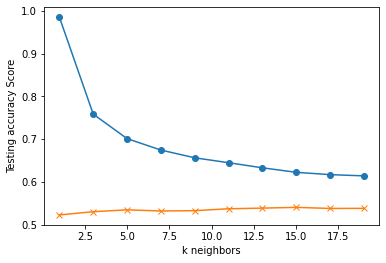

In [13]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

## Train the Model

In [16]:
# Note that k: 3 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=WHAT K WAS CHOSEN???? Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=WHAT K WAS CHOSEN???? Test Acc: 0.535


## Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [17]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [18]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
model = knn
param_grid = params = [{'n_neighbors': [3, 5, 7, 9],
           'weights': ['uniform', 'distance'],
           'leaf_size': [15, 20]}]
grid = GridSearchCV(model, param_grid, verbose=3)

In [19]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] leaf_size=15, n_neighbors=3, weights=uniform ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  leaf_size=15, n_neighbors=3, weights=uniform, score=0.523, total=   0.8s
[CV] leaf_size=15, n_neighbors=3, weights=uniform ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  leaf_size=15, n_neighbors=3, weights=uniform, score=0.528, total=   0.8s
[CV] leaf_size=15, n_neighbors=3, weights=uniform ....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV]  leaf_size=15, n_neighbors=3, weights=uniform, score=0.527, total=   0.8s
[CV] leaf_size=15, n_neighbors=3, weights=uniform ....................
[CV]  leaf_size=15, n_neighbors=3, weights=uniform, score=0.529, total=   0.9s
[CV] leaf_size=15, n_neighbors=3, weights=uniform ....................
[CV]  leaf_size=15, n_neighbors=3, weights=uniform, score=0.524, total=   0.8s
[CV] leaf_size=15, n_neighbors=3, weights=distance ...................
[CV]  leaf_size=15, n_neighbors=3, weights=distance, score=0.518, total=   0.4s
[CV] leaf_size=15, n_neighbors=3, weights=distance ...................
[CV]  leaf_size=15, n_neighbors=3, weights=distance, score=0.520, total=   0.4s
[CV] leaf_size=15, n_neighbors=3, weights=distance ...................
[CV]  leaf_size=15, n_neighbors=3, weights=distance, score=0.521, total=   0.4s
[CV] leaf_size=15, n_neighbors=3, weights=distance ...................
[CV]  leaf_size=15, n_neighbors=3, weights=distance, score=0.527, total=   0.5s
[CV] leaf_size=15

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   55.9s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': [15, 20], 'n_neighbors': [3, 5, 7, 9],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [20]:
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 15, 'n_neighbors': 7, 'weights': 'uniform'}
0.5322554087290008


## Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'K Nearest Neighbors.sav'
joblib.dump(grid.best_score_, filename)